<h1> Activity 1 </h1>

<h3>To lemmatize or stem? It's a good question!</h3>

lemmatize is good for finding a (meaningful) word that is synonymous <b>and</b> has meaning
stemming is similar, but will find the root of the word. It also might come up with nonsense words as 'roots' do not need to be meaningful.

These techniques might come in useful if you have words of a similar 'ilk' and do not care to distinguish between them. The libraries will allow you to identify words in context so for example variations of a word may be verbs, adjectives, nouns etc.

Try out a few variations of words e.g. dancer, dancing, dances etc and see if you can identify a pattern. Word categorisation is harder than it looks! Even when the words are very similar. Let's explore the two main approaches.

In [10]:
import sys
!{sys.executable} -m pip install nltk
!{sys.executable} -m pip install wordcloud

# example 1

# We start with the word dance and try to find variations of the word 'root' or 'origin'.
# Try Dances, Dancing, Dancer etc. See how many combinations of words you can find that share the root.



import nltk
from nltk.stem import PorterStemmer
nltk.download('wordnet')


word = 'Dance'

porter = PorterStemmer()
print("Stemmed word: " + porter.stem(word))

# The stemmed version produces 'danc'

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
print("Lemmatized word: " + wordnet_lemmatizer.lemmatize(word))

# However, when we lemmatize we get the real word dance.

#Can you see how stemming and lemmatization provide different 'origins' of words?


# Extension activity 1: Try to take this example further by using a ["list", "of", "words"]  
# Extension activity 2: Have a go at iterating through a list of words 
# with a for loop to make your code more efficient.

list_of_words = ["list", "of", "words"]
for w in list_of_words:
    print("Stemmed word: " + porter.stem(w) + " Lemmatized word: " + wordnet_lemmatizer.lemmatize(w))
   # print("Lemmatized word: " + wordnet_lemmatizer.lemmatize(w))



Stemmed word: danc
Lemmatized word: Dance
Stemmed word: list Lemmatized word: list
Stemmed word: of Lemmatized word: of
Stemmed word: word Lemmatized word: word


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jelen\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<h3> Additional Resources </h3>
NLTK also has categorisation and tagging options. These are beyond the scope of this course <b>but</b>
If you do wish to explore these, the documentation can be found <a href="https://www.nltk.org/book/ch05.html">here</a>.

Section 1 Using a Tagger and Section 2 Tagged Corpora might be particularly useful resources for your coursework

<h1> Activity 2 </h1>

When working with text we often try to generate a high level overview of a corpus to determine things like its suitability for analysis and general structure/themes. There are a few ways we can do this. Let's begin with our high level analysis of the features of the text - starting with a familiar concept, term frequency!

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jelen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jelen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Without stop words: ['I', 'dance', '.', 'It', 'fun', 'dance', '.']
With stop words: ['I', 'like', 'to', 'dance', '.', 'It', 'is', 'fun', 'to', 'dance', '.']
<FreqDist with 8 samples and 11 outcomes>


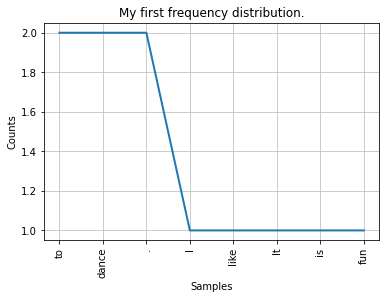

<AxesSubplot:title={'center':'My first frequency distribution.'}, xlabel='Samples', ylabel='Counts'>

In [2]:
# example two, plotting popular words

import nltk
nltk.download('punkt')
nltk.download('stopwords')

# You don't have to include stopwords. You may decide to keep them in for your analysis.
from nltk.corpus import stopwords


# Let's save some time and use a library that is fit for purpose. No point reinventing the wheel!
from nltk.probability import FreqDist

sentence="I like to dance. It is fun to dance."
# You might also wish to 'standardise' the text to lowercase using sentence.lower(). 
# Uncomment the line below (remove the #) if you do wish to standardise.

#sentence = sentence.lower()

tokens = nltk.tokenize.word_tokenize(sentence)

# This is one way to remove stopwords
# Stopwords are "in, a, the, like, -!?, can, be"
filtered = [word for word in tokens if not word in stopwords.words()]
print("Without stop words:", filtered)

f_dist = FreqDist(tokens)

print("With stop words:", tokens)
print(f_dist)

# We can plot the data we have in a relatively simple manner, either with or without stopwords. 
import matplotlib.pyplot as plt
fd = nltk.FreqDist(tokens)

# We will feed our plot all '8' words as a parameter for our plot. We also want to set cumulative as 'false'
fd.plot(8,cumulative=False, title="My first frequency distribution.")

<h1> Activity 3 </h1>
<h3>Sentiment analysis is another way to contextualise words and their associated meaning. </h3>

We can think of sentiment as either positive or negative, but this is a spectrum. 'Good' is not the same as 'Great.' It's good, but it's not great! I like chocolate but love coffee. If you gave me the choice of either chocolate or coffee, I'd always choose coffee!

Some words perhaps do not have any sentiment at all, e.g. table, cabbage.

We will use a popular library for social media data analysis to quickly calculate some metrics and see how we can turn a word into a quantifiable metric based on some predefined rules.

In [12]:
# example 4 detecting sentiment - the easy way

from nltk.sentiment.vader import SentimentIntensityAnalyzer

# You will also want to load the Lexicon that quantifies polar sentiment (positive/negative)
# Again, with Python, other people have often done the heavy lifting for us!
nltk.download('vader_lexicon')

analyzer=SentimentIntensityAnalyzer()

# Values live on a spectrum. Love is more extremely positive than like for example.
sentence = "I love sandwiches. I hate cheese."

# Try tweaking this sentence with your own words and phrases. 
# Does the order of words matter? Can you find any surprising categorisations of +/- sentiment?

analyzer.polarity_scores(sentence)
sentence2 = "I love you"
analyzer.polarity_scores(sentence2)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jelen\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}

<h1> Activity 4 </h1>
<h3> High level visualisations for narrative </h3>
We cover visualisations later, but let's have a look at how we might visualise some given text in a simple way.

This is really helpful in the context of exploratory data analysis to give us a high level overview of words.

I love sandwiches. I hate cheese.


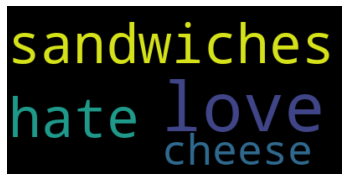

In [4]:
# example 4 final, plotting a word cloud

from wordcloud import WordCloud

print(sentence)
sentence = 'I love sandwiches. I hate cheese.'

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(sentence)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')

# bilinear interpolation is a way to spread the words out without them bumping into one another
plt.axis("off")
plt.show()

# Do you notice some words missing? Did you remove stopwords? Have a go at loading a file in.
# Can you produce a wordcloud of some text that you are interested in analysing?

We've seen some very simple examples of what we can do here. Use this boiletplate code to pick a 'theme' of your own. Find a dataset that contains some words and see if you can work through the data processing pipeline in the same way.

Finally, see if you can share a mini analysis of your own using some or even all of the tools you have learned about.